В начале работы имопортируются все необходимые библиотеки.

In [100]:
import warnings
warnings.filterwarnings('ignore')

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from yellowbrick.regressor import PredictionError

Данные были введены в соответствии с вариантом. Где X - признак, а y - объясняемая переменная. Так как в sklearn сэмплы являются строчками, а признаки столбцами, то данные были трансформированы с помощью функции reshape().

In [102]:
X = np.array([3, 3, 6, 6, 7, 8, 9]).reshape(-1, 1)
y = np.array([10, 9.7, 11.6, 12.1, 13.2, 13.9, 15.6]).reshape(-1, 1)

Далее была создана, обучена и оценена модель линейной регрессии. Оценка производится с помощью R^2 - коэффициента детерминации, показывающий отношение объяснённой суммы квадратов к общей.

In [103]:
lin_model = LinearRegression()
lin_model.fit(X, y)
print("R^2 =", lin_model.score(X, y))

R^2 = 0.9590280365126677


Далее были выведены истинные и предсказанные значения для каждой точки.

In [104]:
y_pred = lin_model.predict(X)
pd.DataFrame(np.hstack((y, y_pred)), columns=['actual','predicted'])

,actual,predicted
0,10.0,9.609375
1,9.7,9.609375
2,11.6,12.300000
3,12.1,12.300000
4,13.2,13.196875
5,13.9,14.093750
6,15.6,14.990625


После были выведены коэффициенты линейной регрессии. Уравнение линейной регрессии: y_hat = a + b * x, следовательно коэффициент a отвечает за смещение линии регрессии, а b за её наклон.

In [105]:
a = lin_model.coef_
b = lin_model.intercept_
print('a:',a,'b:',b)

a: [[0.896875]] b: [6.91875]


Далее были выведены различные метрики. Mean absoluete error показывает средний модуль ошибки, mean squared error показывает средний квадрат ошибки, root mean squared error показывает средний корень квадрата ошибки. R^2 показывающий отношение объяснённой суммы квадратов к общей. Можно сказать, что первые три метрики являются ненормализованными, а R^2 является нормализованной.

In [106]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('R2 metric:', metrics.r2_score(y, y_pred))

Mean Absolute Error: 0.3125000000000003
Mean Squared Error: 0.15709821428571427
Root Mean Squared Error: 0.3963561709948695
R2 metric: 0.9590280365126677


Далее представлен график, показывающий разницу предсказанного и истинного значения. Если точка находится выше линии нулевой разницы, то предсказанное значение больше истинного, если ниже - предсказанное меньше истинного.

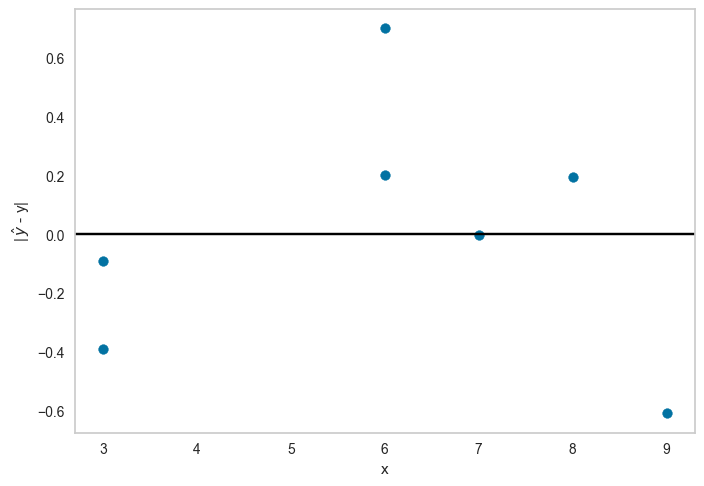

In [107]:
diff = y_pred - y
plt.scatter(X, diff)
plt.axhline(y=0, color='black', )
plt.xlabel('x')
plt.ylabel('|$\hat{\,y}$ - y|')
plt.legend()
plt.grid()
plt.show()

График с линией регрессии и истинными значениями представлен ниже.

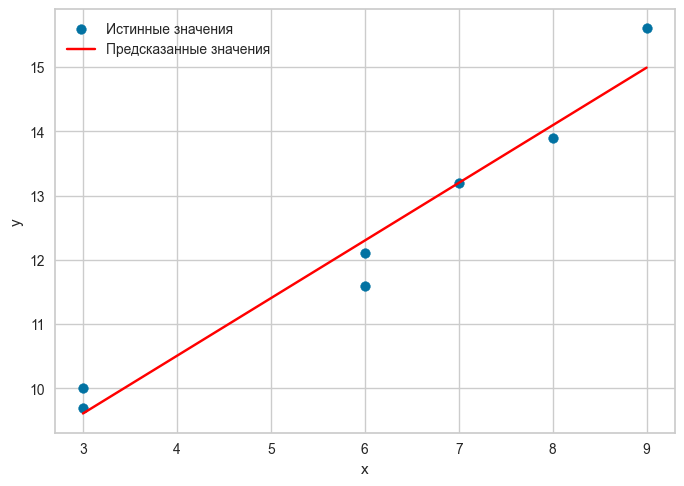

In [108]:
plt.scatter(X, y, label='Истинные значения')
plt.plot(X, y_pred, color='red', label='Предсказанные значения')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

Исходя из метрики R^2 = 0.95 можно сделать вывод, что модель линейной регрессии отлично подходит к представленным данным. Следовательно её можно использовать для предсказаний значений y.

В следующей части работы была создана модель полиномиальной регрессии 2 степени с помощью функции PolynomialFeatures, создающей полиномиальные признаки заданной степени. После чего были произведены предсказания и выведены метрики MAE и R^2.

In [109]:
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
y_poly_pred = lin_reg.predict(X_poly)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_poly_pred, y))
print('R2 metric:', metrics.r2_score(y_poly_pred, y))

Mean Absolute Error: 0.1976161745511857
R2 metric: 0.9883100532450473


Затем была построена визуализация линии регрессии и истинных значений. Как мы видим, линия лучше повторяет форму данных благодаря 2 степени полинома.

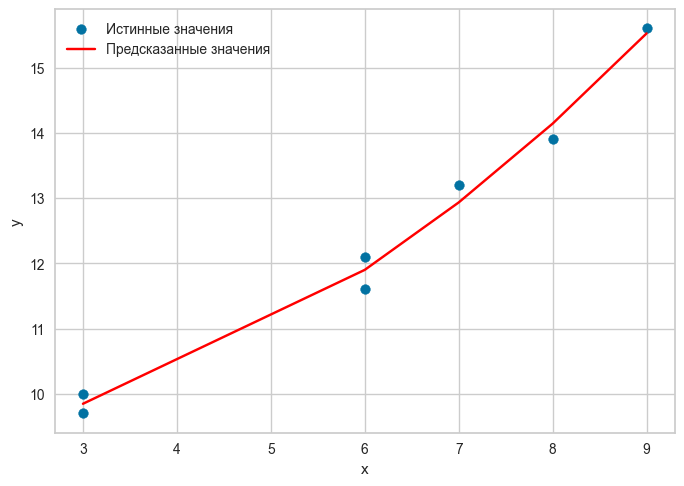

In [110]:
plt.scatter(X, y, label='Истинные значения')
plt.plot(X, y_poly_pred, color='red', label='Предсказанные значения')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

Для сравнения была создана регрессия с полиномом 5-ой степени. Для неё также были выполнены предсказания и выведены метрики.

In [111]:
poly_features = PolynomialFeatures(degree=5)
X_poly = poly_features.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
y_poly_pred = lin_reg.predict(X_poly)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_poly_pred, y))
print('R2 metric:', metrics.r2_score(y_poly_pred, y))

Mean Absolute Error: 0.11428571428678579
R2 metric: 0.993625796775419


Точно так же была выведен график с регрессией и предсказанными значениями. Как можно заметить на графике, линия регрессии почти полностью проходит через точки с данными.

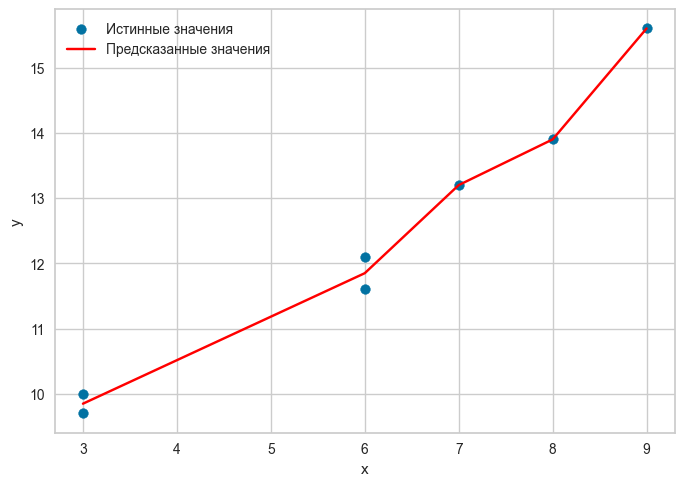

In [112]:
plt.scatter(X, y, label='Истинные значения') 
plt.plot(X, y_poly_pred, color='red', label='Предсказанные значения')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

Обе регрессии показали высокие результаты предсказания, следовательно их можно использовать для предсказания значений y.
После обучения моделей с разными степенями полинома, можно сказать, что чем выше степень полинома, тем предсказанные значения становятся ближе к истинным на тренировочных данных. Однако выбор высокой степени полинома грозит переобучением, что отразится на способности модели работать на новых данных.

В следующей части работы была произведена работа с набором данных car_price, содержащий данные об автомобилях.

In [113]:
df_car = pd.read_csv('carprice.csv')
df_car

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


В качестве целевой переменнной была выбрана переменная price (цена автомобиля), а также была построена гистограмма для этого столбца. Исходя из гистограммы можно сказать, что больше всего автомобилей ценой от 5 до 10 тысяч.

In [114]:
y = df_car['price']
X = df_car.drop(['price', 'symboling', 'car_ID'], axis=1)

Text(0, 0.5, 'Частота')

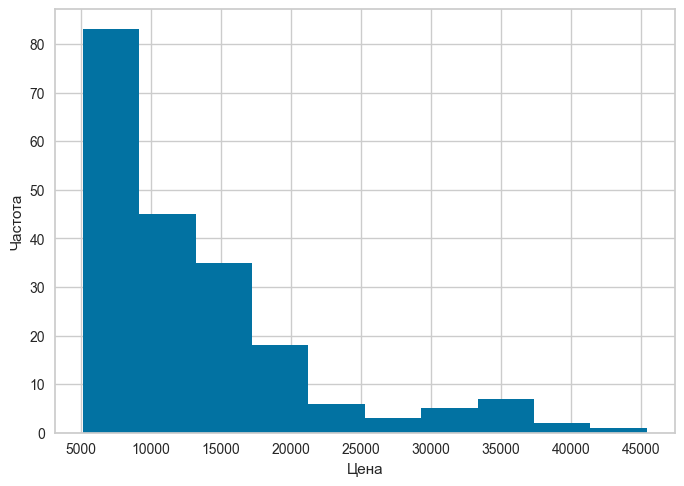

In [115]:
plt.hist(y)
plt.xlabel("Цена")
plt.ylabel('Частота')

А также был построен boxplot. На графике видно, что медиана цены равна 10000, первый и третий квартиль равны 5000 и 28000 соответственно.

{'whiskers': [<matplotlib.lines.Line2D at 0x177df30dca0>,
 'caps': [<matplotlib.lines.Line2D at 0x177df30c1d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x177df30dd90>],
 'medians': [<matplotlib.lines.Line2D at 0x177dc8afce0>],
 'fliers': [<matplotlib.lines.Line2D at 0x177dc8afe90>],
 'means': []}

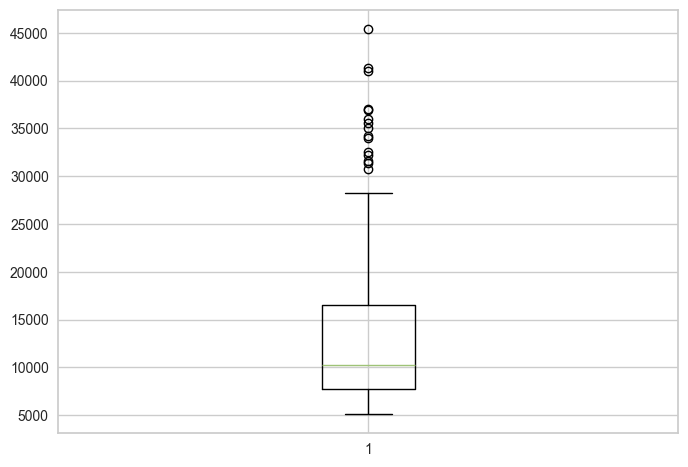

In [116]:
plt.boxplot(y)

Далее построена матрица диаграмм рассеяния, позволяющая примерно определить наличие и отсутствие корреляции, а также форму распределения случайных величин. Молжно увидеть положительную корреляццию между длиной ,шириной, высотой, размером двигателя, багажника, количеством лошадиных сил и ценой автомобиля. А также отрицательную корреляцию между расходом топлива и ценой.

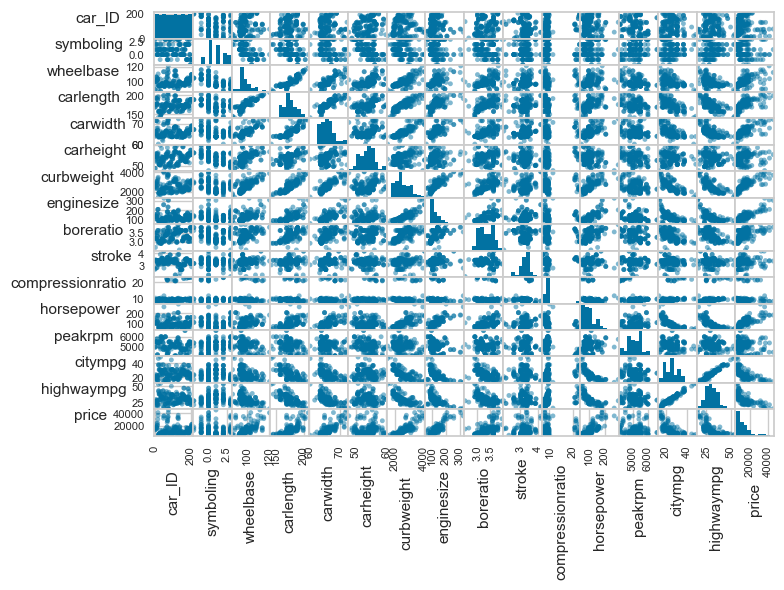

In [117]:
axes = pd.plotting.scatter_matrix(df_car, diagonal='hist')
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

Далее были предобработаны данные: была произведена кодировка категориальных данных, нормализация числовых данных, а с помощью функции train_test_split данные были разделены на обучающие и валидационные.

In [118]:
X_cat = X.select_dtypes(exclude=['number'])
X_cat_names = X_cat.columns
encoder = OrdinalEncoder()
encoder.fit(X_cat)
X_cat = encoder.transform(X_cat)
X_num = X.select_dtypes(include=['number'])
X_num_names = X_num.columns
sc = StandardScaler()
sc.fit(X_num)
X_scaled = sc.transform(X_num)
X_prep = np.hstack([X_scaled, X_cat])
X_train,X_valid,y_train,y_valid = train_test_split(X_prep,y,test_size=0.2,random_state=0)

In [119]:
sc.transform(X_num)

array([[-1.6907718 , -0.42652147, -0.84478235, ..., -0.26296022,
        -0.64655303, -0.54605874],
       [-1.6907718 , -0.42652147, -0.84478235, ..., -0.26296022,
        -0.64655303, -0.54605874],
       [-0.70859588, -0.23151305, -0.19056612, ..., -0.26296022,
        -0.95301169, -0.69162706],
       ...,
       [ 1.72187336,  1.19854871,  1.39824472, ...,  0.78785546,
        -1.10624102, -1.12833203],
       [ 1.72187336,  1.19854871,  1.39824472, ..., -0.68328649,
         0.11959362, -0.54605874],
       [ 1.72187336,  1.19854871,  1.39824472, ...,  0.57769233,
        -0.95301169, -0.83719538]])

Линейная регрессия была создана с регуляризаций ridge и параметром alpha = 5.0. После чего модель была обучена на тренировочных данных и оценена на валидационных данных.

In [120]:
lin_model = Ridge(alpha=5.0)
lin_model.fit(X_train, y_train)
lin_model.score(X_valid, y_valid)

0.8450681803437459

Были выведены истинные и предсказанные значения цены в формате таблицы.

In [121]:
y_pred = lin_model.predict(X_valid)
pd.DataFrame(np.transpose(np.vstack((y_valid, y_pred))), columns=['actual','predicted'])

,actual,predicted
0,6795.0,6432.705793
1,15750.0,17380.320539
2,15250.0,14248.694224
3,5151.0,937.710723
4,9995.0,9581.022084
5,11199.0,13812.105353
6,5389.0,6378.326947
7,7898.0,4284.858104
8,17199.0,21246.752912
9,6529.0,8380.318534


А также выведены метрики оценки модели. Так как R^2 = 0.84, модель может довольно хорошо предсказывать цену автомобиля.

In [122]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_valid, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, y_pred)))
print('R2 metric:', metrics.r2_score(y_valid, y_pred))

Mean Absolute Error: 2357.875854253657
Mean Squared Error: 11994257.250524182
Root Mean Squared Error: 3463.272621455634
R2 metric: 0.8450681803437459


Далее были выведены коэфффициенты линейной регрессии для каждого признака. Большее абсолютное значение означает, что признак имеет большее значение в определнии цены. Наиболее сильно влияющими на целевую переменную оказались признаки enginelocation, enginesize и horsepower.

In [123]:
df_coef = pd.DataFrame(lin_model.coef_, X_num_names.append(X_cat_names),
columns=['Коэффициент'])
df_coef.sort_values(by='Коэффициент')

,Коэффициент
carbody,-1258.451098
doornumber,-1233.419950
stroke,-895.147000
citympg,-301.130955
boreratio,-201.771042
carlength,-184.959382
cylindernumber,-113.190931
fueltype,-84.445656
fuelsystem,-58.651675
CarName,-25.691961


Далее был построен график с предсказанными и истинными значениями.

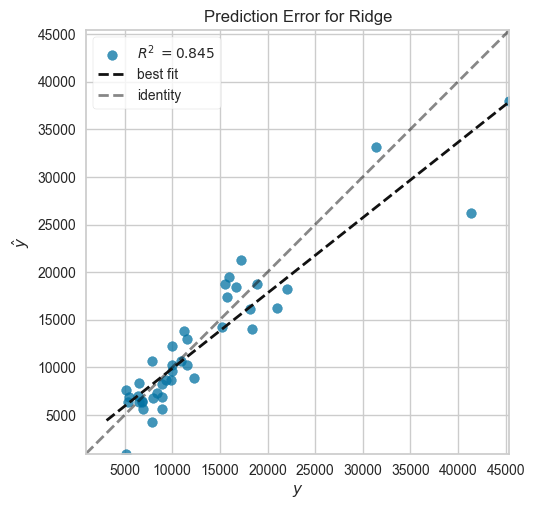

<Axes: title={'center': 'Prediction Error for Ridge'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [124]:
visualizer_lin = PredictionError(lin_model)
visualizer_lin.fit(X_train, y_train)
visualizer_lin.score(X_valid, y_valid)
visualizer_lin.show()

В следующей части работы была выполнена регрессия методом решающих деревьев, а также была проведена оценка этой модели. Оценка R^2 = 0.87 показывает, что модель хорошо справляется с определением цены автомобиля.

In [125]:
DecisionTreeRegressor().get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'monotonic_cst', 'random_state', 'splitter'])

In [126]:
from sklearn.tree import DecisionTreeRegressor


dtree = DecisionTreeRegressor()
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [i for i in range(1, 10, 2)],
    'min_samles_split': [i for i in range(1, 101, 20)],
    'min_samples_leaf': [i for i in range(1, 51, 25)],
    'max_features': ['sqrt', 'log2']
}
clf = GridSearchCV(dtree, param_grid).fit(X_train, y_train)
clf
# dtree.score(X_valid, y_valid)

ValueError: Invalid parameter 'min_samles_split' for estimator DecisionTreeRegressor(criterion='gini', max_depth=1, max_features='sqrt'). Valid parameters are: ['ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'monotonic_cst', 'random_state', 'splitter'].

Далее был построен график с истинными и предсказанными значениями для модели решающих деревьев.

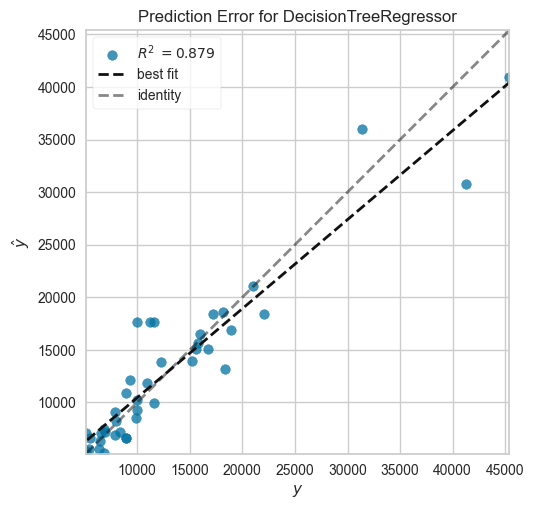

<Axes: title={'center': 'Prediction Error for DecisionTreeRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [ ]:
visualizer_dtree = PredictionError(dtree)
visualizer_dtree.fit(X_train, y_train)
visualizer_dtree.score(X_valid, y_valid)
visualizer_dtree.show()

А также был выведен график с истинными и предсказанными значениям для моделей линейной регрессии и решающий деревьев.

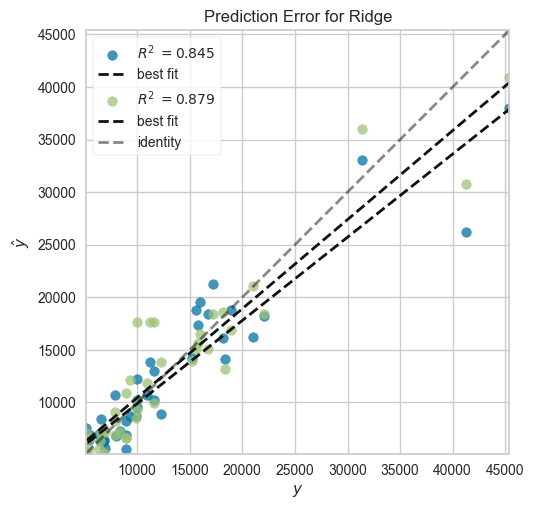

<Axes: title={'center': 'Prediction Error for Ridge'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [ ]:
visualizer_dtree = PredictionError(dtree)
visualizer_lin = PredictionError(lin_model)
visualizer_lin.fit(X_train, y_train)
visualizer_lin.score(X_valid, y_valid)
visualizer_dtree.fit(X_train, y_train)
visualizer_dtree.score(X_valid, y_valid)
visualizer_lin.show()

Дополнительное задание: Осуществить подбор оптимальных параметров с помощью GridSearchCV для дерева решений.
Сравнить качество модели для подобранных параметров и любых других.

В качестве параметров для выбора были взяты критерий разделения, высота дерева, минимальное количество объектов в ноде дерева, максимальное количество признаков в выборе, минимальное количество объектов для разделения ноды. Лучшими параметрами оказались: 'criterion': 'squared_error', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10,'splitter': 'best'.

In [205]:
from sklearn.tree import DecisionTreeRegressor

param_grid = {
    'criterion': ['friedman_mse', 'absolute_error', 'poisson', 'squared_error'],
    'splitter': ['best', 'random'],
    'max_depth': [i for i in range(1, 10, 2)],
    'min_samples_leaf': [i for i in range(1, 51, 25)],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [i for i in range(2, 11, 2)]
}
clf = GridSearchCV(DecisionTreeRegressor(), param_grid).fit(X_train, y_train)
clf.best_params_, clf.best_estimator_.score(X_valid, y_valid)

({'criterion': 'squared_error',
  'max_depth': 5,
  'max_features': 'sqrt',
  'min_samples_leaf': 1,
  'min_samples_split': 10,
  'splitter': 'best'},
 0.9057610211343218)

Для сравнения была создана модель решающего дерева с максимальной высотой дерева 3 и критерием квадратной ошибки. Дерево, полученное с помощью поиска лучших параметров, показало себя лучше, его R^2 равен 0.90, а R^2 дерева со случайными параметрами равен 0.85.

In [181]:
dtree = DecisionTreeRegressor(max_depth=3, criterion='squared_error')
dtree.fit(X_train, y_train).score(X_valid,y_valid)

0.8561618381600763

В ходе выполнения лабораторной работы была реализована простая линейная регрессия. В результате эта модель может хорошо (R^2 = 0.95) предсказывать значения y.

При работе с моделью полиноминальной регрессии, было замечено, что с возрастанием степени полинома, предсказания становятся ближе к истинным значениям, однако слишком большая степень полинома приводит к переобучению.

В последней части работы был рассмотрен набор данных с информацией об автомобилях, целевой выбрана переменная price (цена), наибольшее влияние на неё оказали признаки enginelocation, enginesize и horsepower. Для этого набора данных наиболее эффективной оказалась модель дерева решений.